**Importing** **packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Gathering** **data**


In [2]:
df=loan_train=pd.read_csv('/content/loan-train.csv')


In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.isnull().sum()  # Checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_train_columns=df.columns
loan_train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
def explore_object_type(df,feature_name):
  if df[feature_name].dtype=='object':
    print(df[feature_name].value_counts())

In [10]:
explore_object_type(loan_train,'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [11]:
for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: >

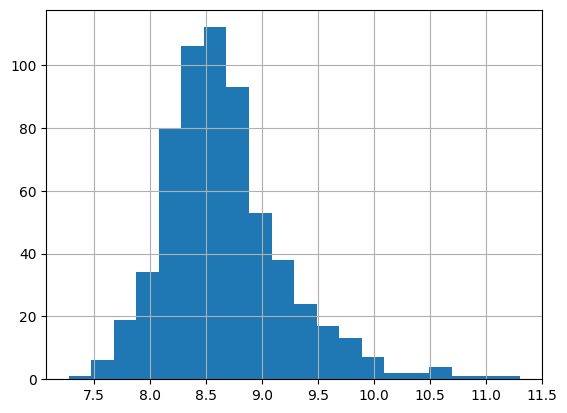

In [18]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

<Axes: >

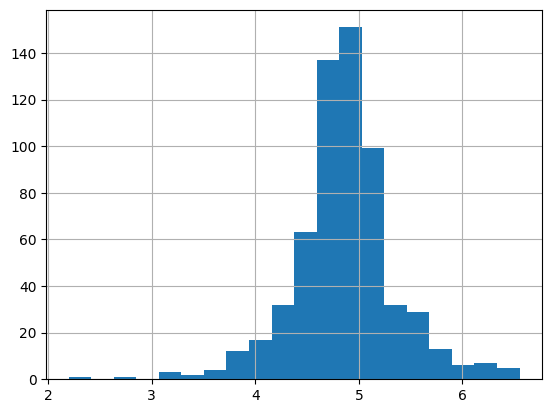

In [19]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

**Checking the null values using missingno and plots**

In [12]:
import missingno as msno

In [13]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

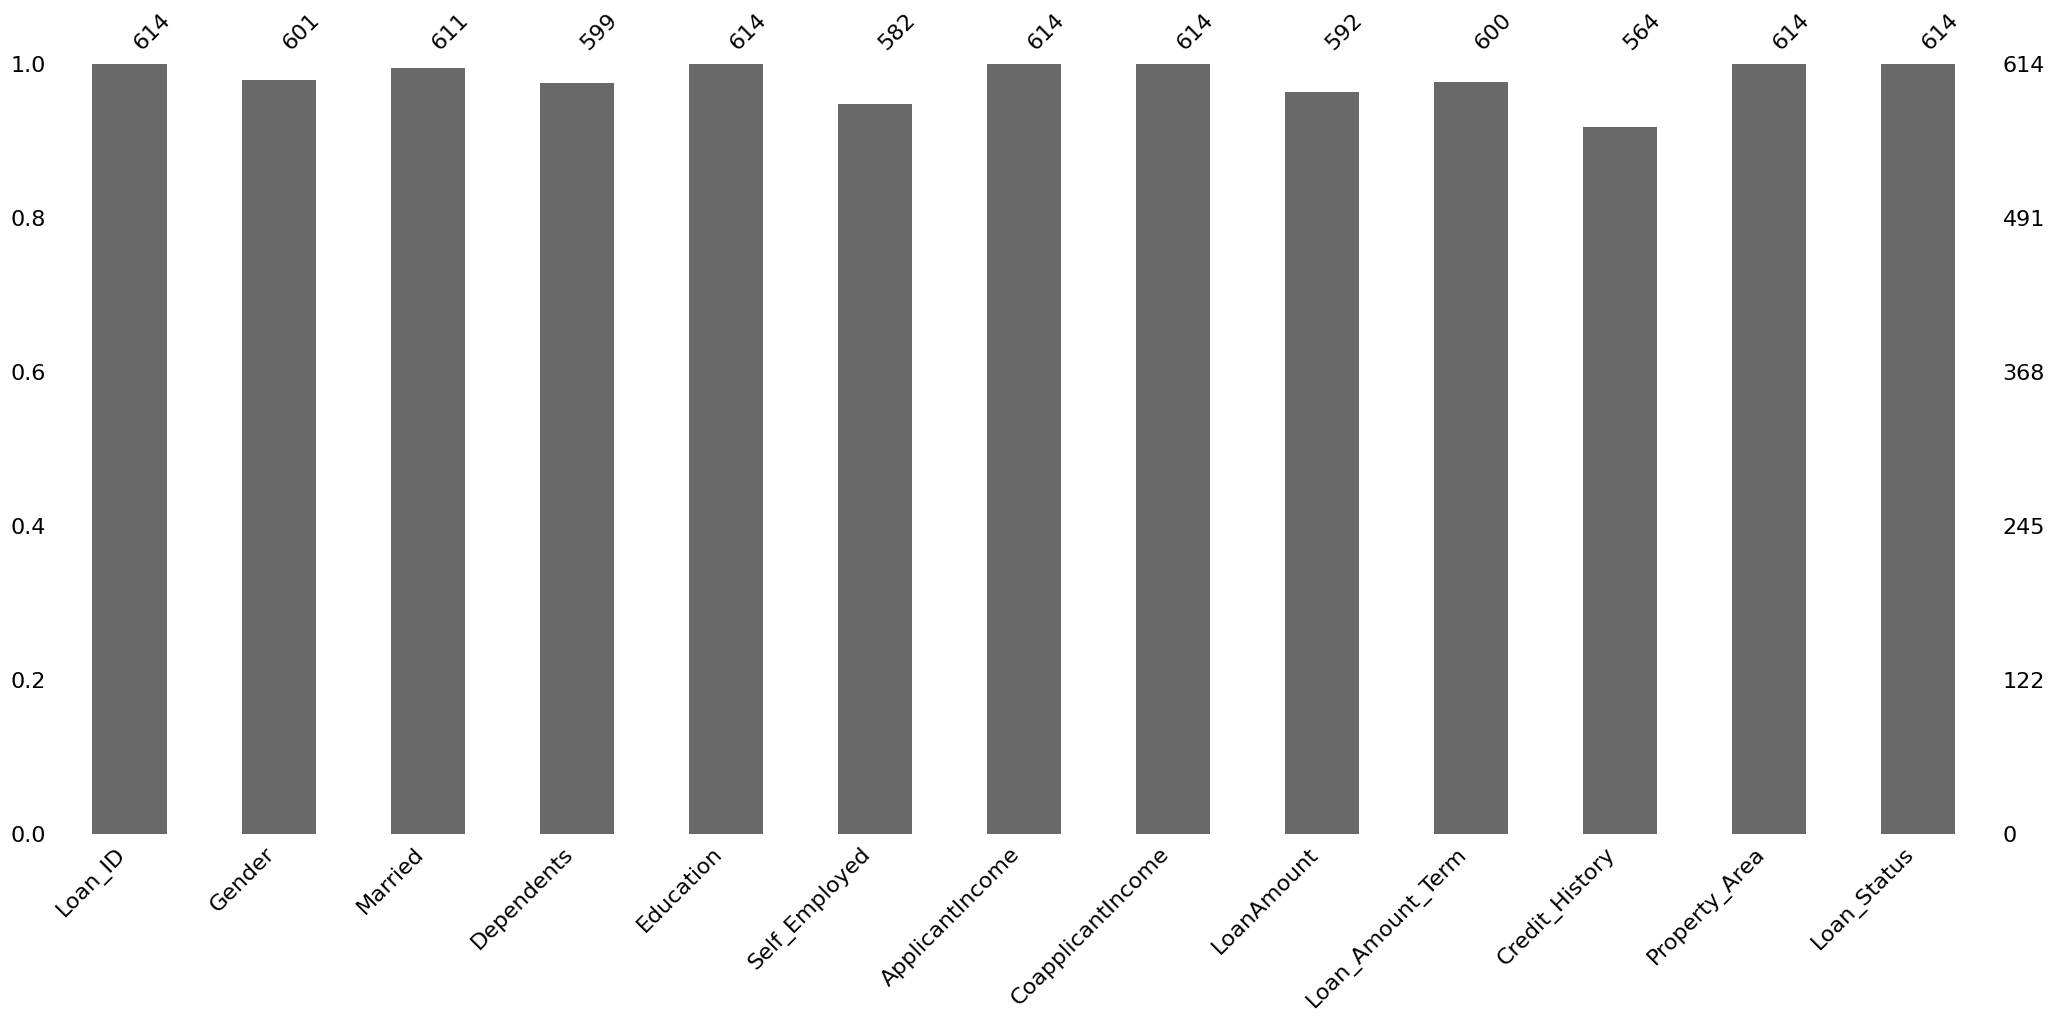

In [14]:
msno.bar(loan_train)

<Axes: >

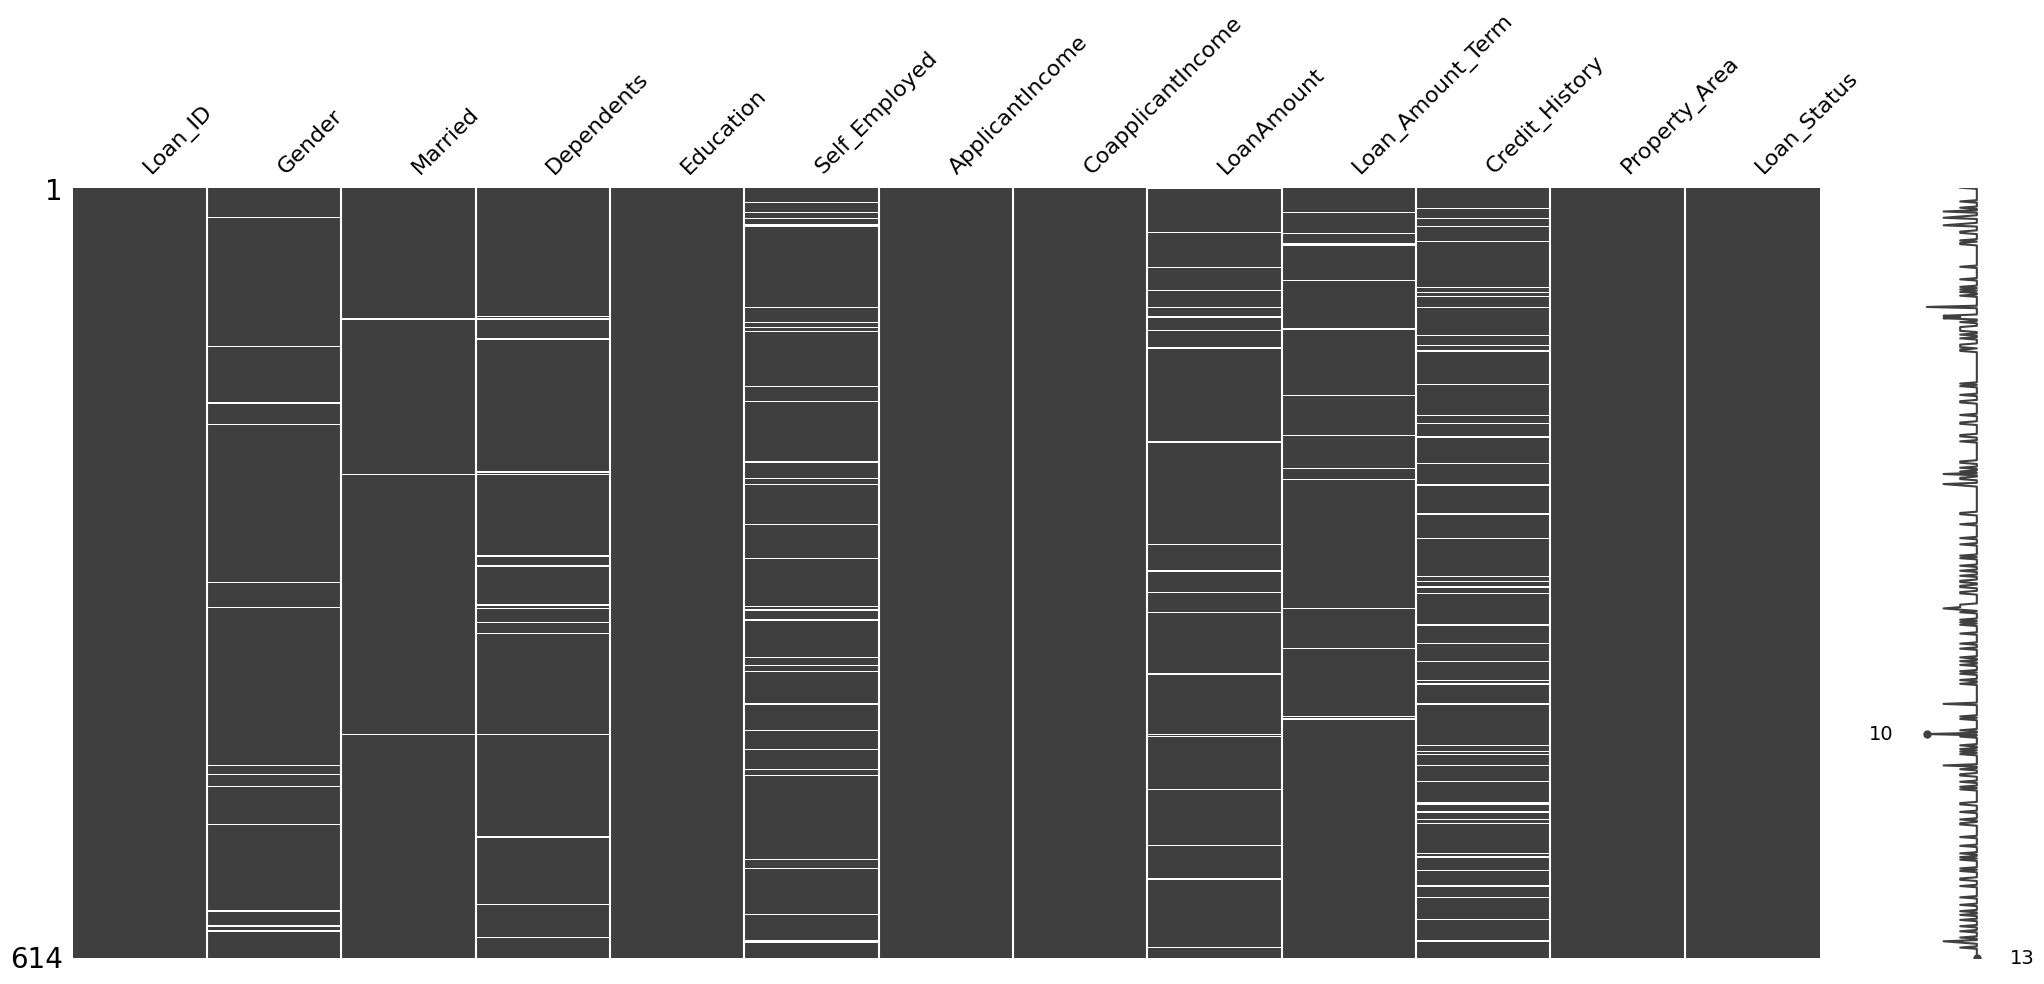

In [15]:
msno.matrix(loan_train)

**Conversion of categorical values with numerical values**

In [16]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})


loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})


loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})


loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})


loan_train.Education = loan_train.Education.replace({"Graduate": 1, "Not Graduate" : 0})
# finally all values are converted to numerical values

**Filling the null values with mean values or mode values**

In [20]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_Log=df.LoanAmount_log.fillna(df.LoanAmount_log.mode()[0],inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['LoanAmount'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)


In [21]:
# Again checking the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [22]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([[1.0, 0.0, '0', ..., 1.0, 5849.0, 8.674025985443025],
       [1.0, 1.0, '1', ..., 1.0, 6091.0, 8.714567550836485],
       [1.0, 1.0, '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       [1.0, 1.0, '1', ..., 1.0, 8312.0, 9.025455532779063],
       [1.0, 1.0, '2', ..., 1.0, 7583.0, 8.933664178700935],
       [0.0, 0.0, '0', ..., 0.0, 4583.0, 8.430109084509125]], dtype=object)

In [23]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

**Exploratory data analysis using different plots/graphs**

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

In [25]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026,4.986426
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568,4.852030
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368,4.189655
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323,4.787492
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,Rural,1,2900.0,7.972466,4.262680
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.000000,180.0,1.0,Rural,1,4106.0,8.320205,3.688879
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,Urban,1,8312.0,9.025456,5.533389
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,Urban,1,7583.0,8.933664,5.231109


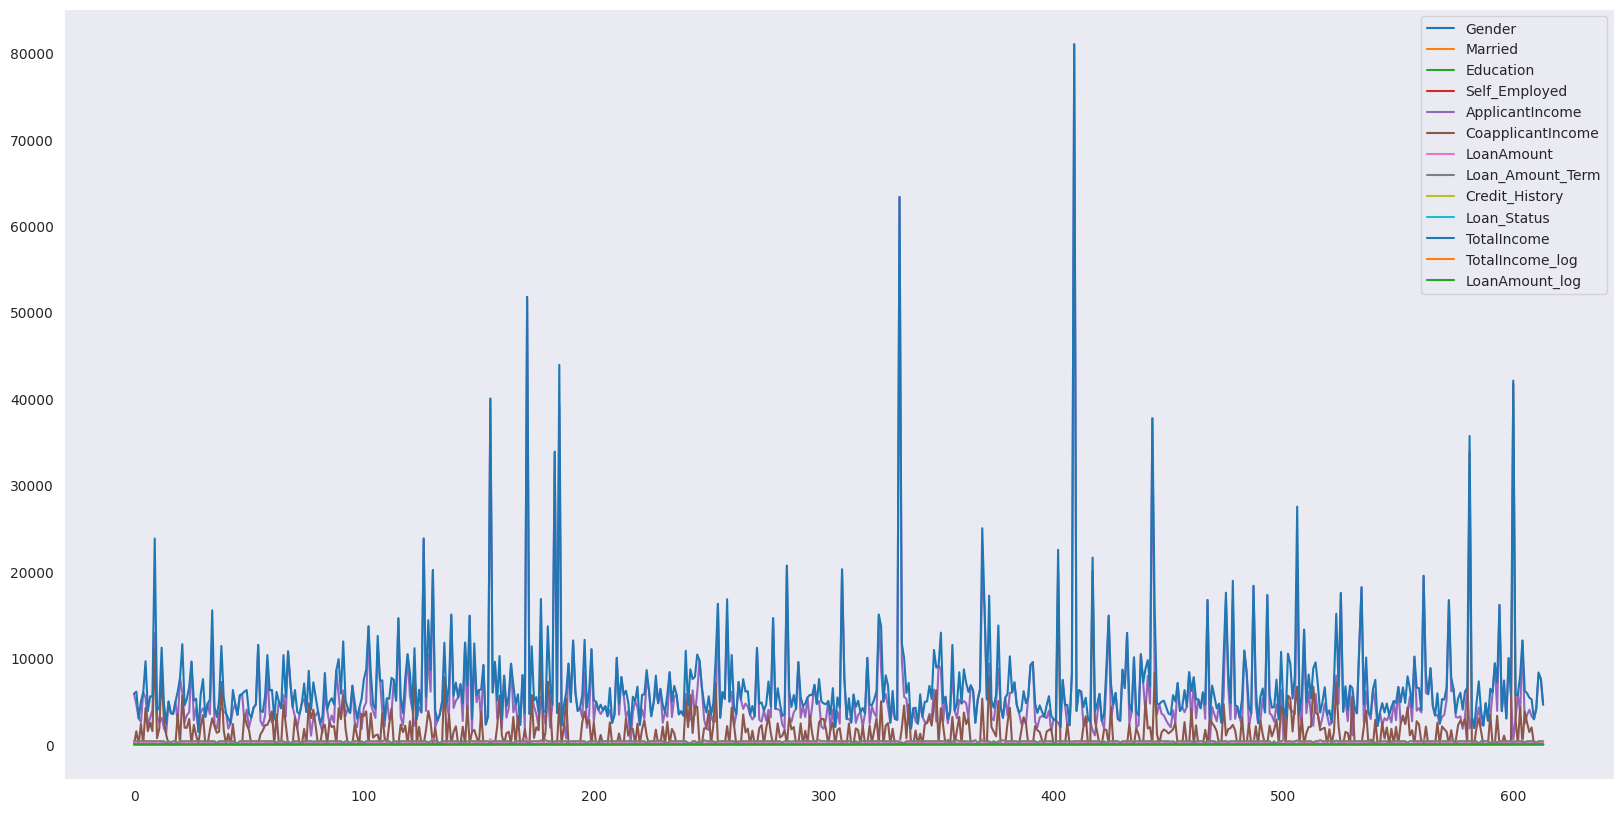

In [26]:
loan_train.plot(figsize=(20,10))
plt.show()

number of people who take loan as group by gender:
1.0    502
0.0    112
Name: Gender, dtype: int64


<ipython-input-27-7becbf99e141>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=loan_train,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

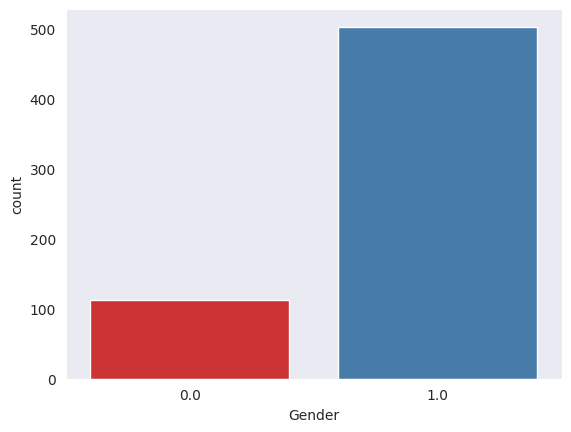

In [27]:
print("number of people who take loan as group by gender:")
print(loan_train['Gender'].value_counts())
sns.countplot(x='Gender',data=loan_train,palette='Set1')

number of people who take loan as group by marital status:
1.0    401
0.0    213
Name: Married, dtype: int64


<ipython-input-28-2e1cbec3b7e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=loan_train,palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

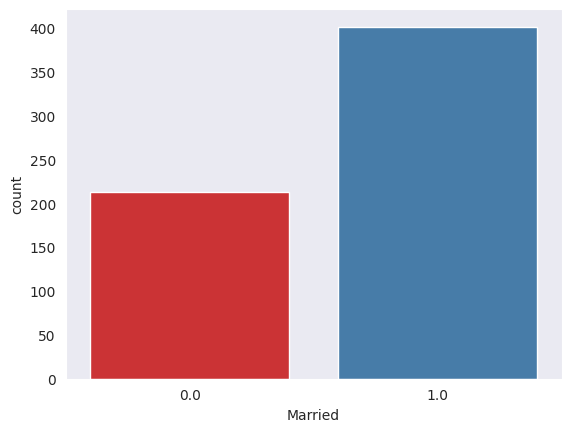

In [28]:
print("number of people who take loan as group by marital status:")
print(loan_train['Married'].value_counts())
sns.countplot(x='Married',data=loan_train,palette='Set1')

number of people who take loan as group by dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<ipython-input-29-64eddfeed0c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=loan_train,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

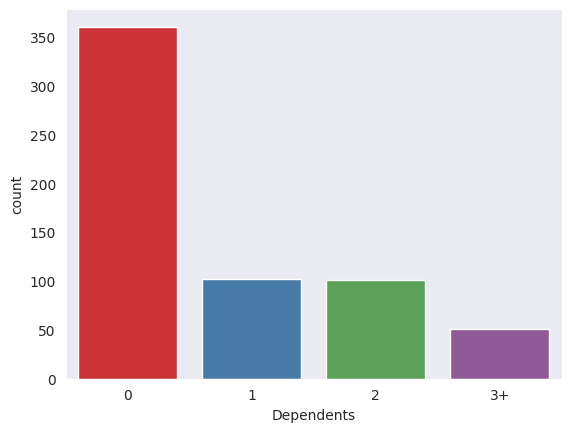

In [29]:
print("number of people who take loan as group by dependents:")
print(loan_train['Dependents'].value_counts())
sns.countplot(x='Dependents',data=loan_train,palette='Set1')

number of people who take loan as group by credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<ipython-input-30-c5cc21b2d19d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History',data=loan_train,palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

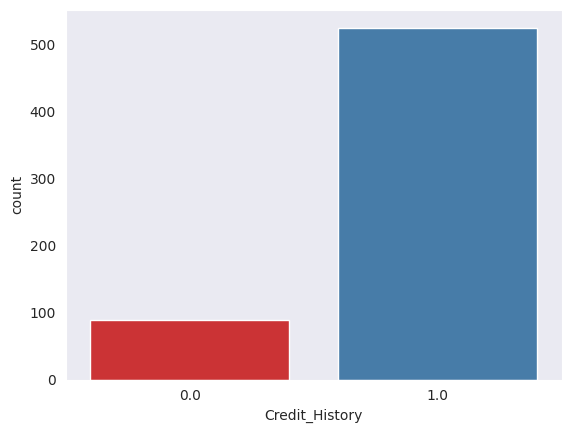

In [30]:
print("number of people who take loan as group by credit history:")
print(loan_train['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=loan_train,palette='Set1')

number of people who take loan as group by Gender:
1.0    502
0.0    112
Name: Gender, dtype: int64


<ipython-input-31-9e602f796a4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=loan_train,palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

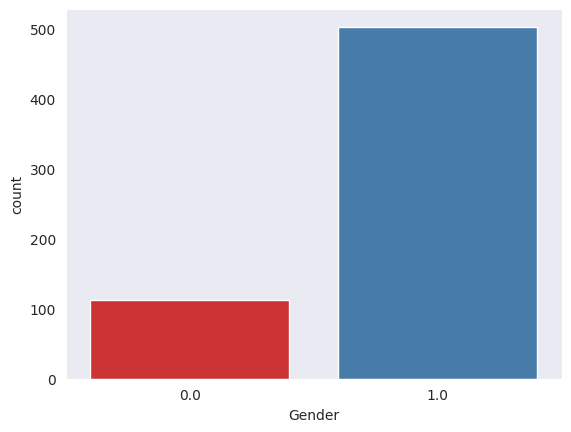

In [31]:
print("number of people who take loan as group by Gender:")
print(loan_train['Gender'].value_counts())
sns.countplot(x='Gender',data=loan_train,palette='Set1')

number of people who take loan as group by LoanAmount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<ipython-input-32-6d6103926985>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount',data=loan_train,palette='Set2')


<Axes: xlabel='LoanAmount', ylabel='count'>

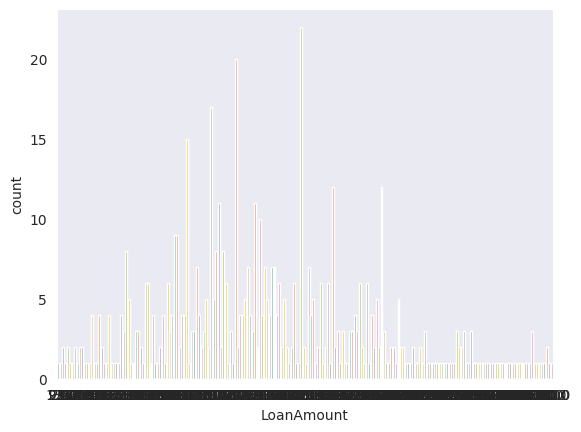

In [32]:
print("number of people who take loan as group by LoanAmount:")
print(loan_train['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=loan_train,palette='Set2')

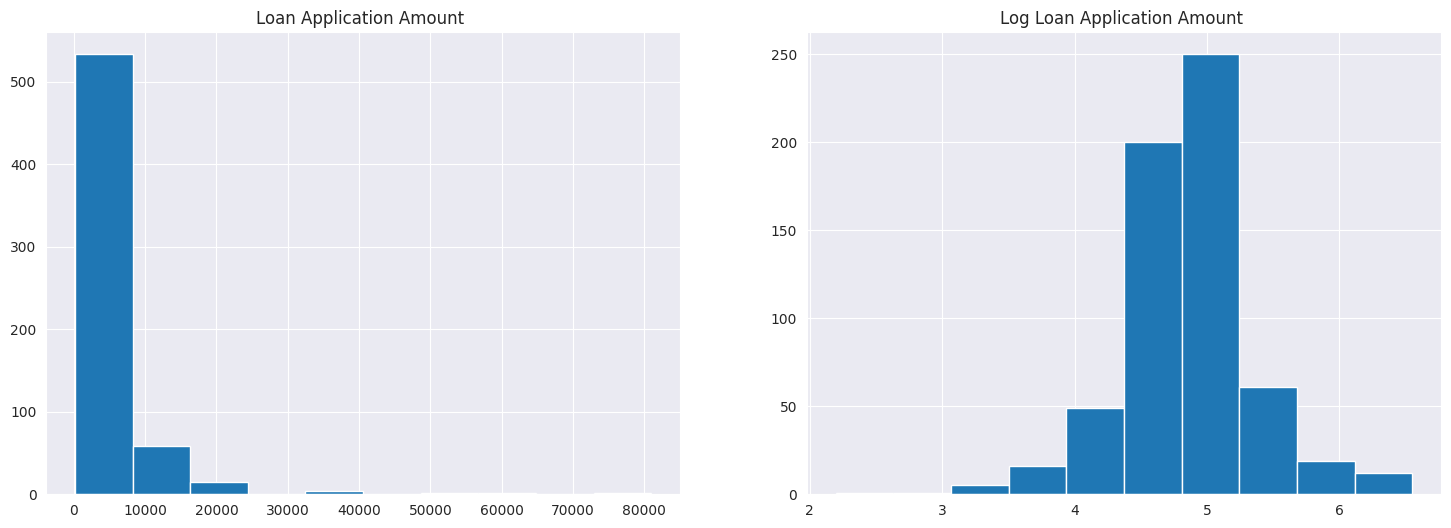

In [33]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

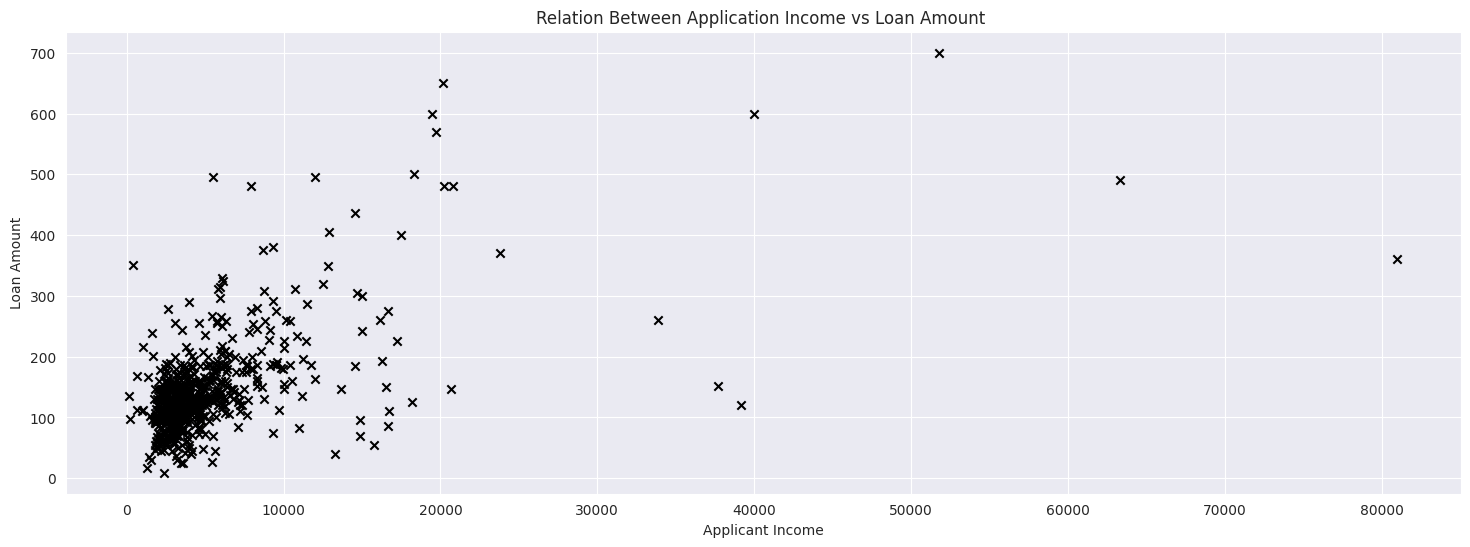

In [34]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

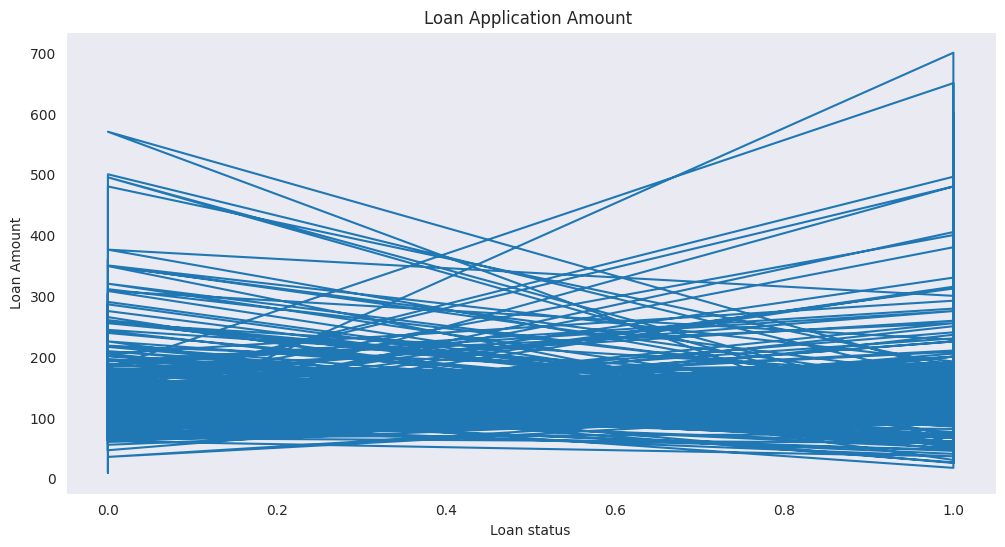

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.xlabel("Loan status")
plt.ylabel("Loan Amount")
plt.show()

<ipython-input-36-13c5e0f78462>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


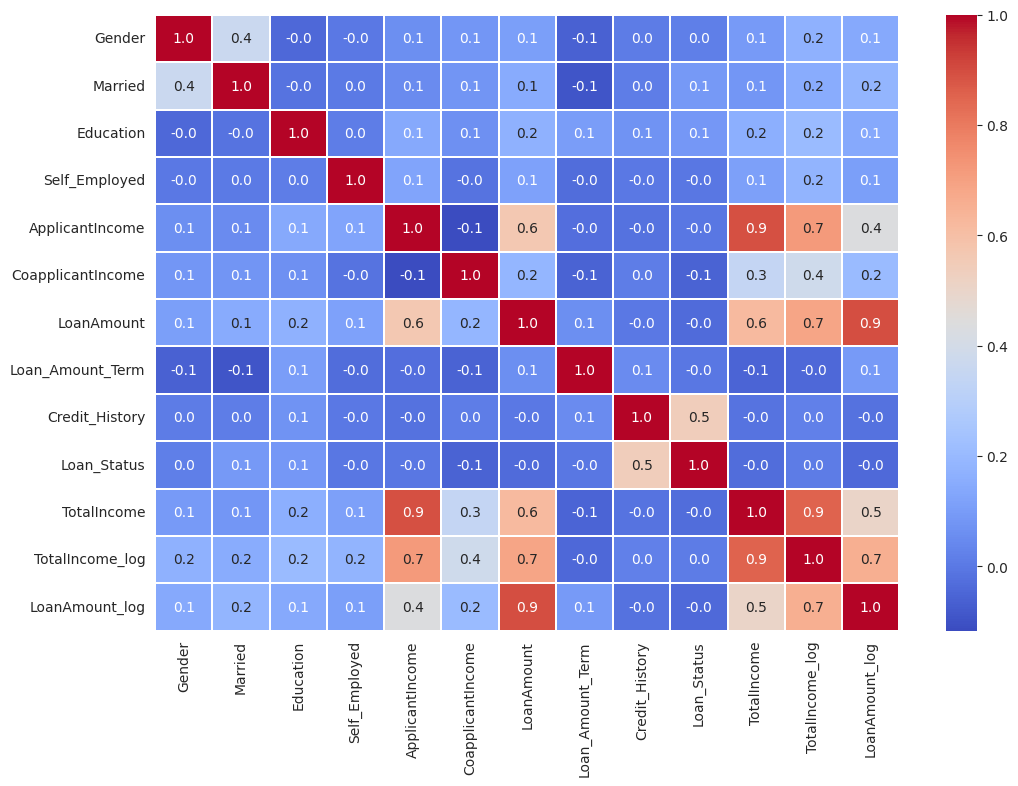

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

**Choosing different Ml models and training and testing the data**

In [37]:

!pip install scikit-learn
import sklearn





In [38]:
!pip install scikit-learn[metrics]

In [39]:
import sklearn.metrics as metrics

In [40]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [41]:
logistic_model=LogisticRegression()

**Training the model**

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()

In [43]:
for i in range(0,5):
  x_train[:,i]=LabelEncoder_x.fit_transform(x_train[:,i])
  x_train[:,7]=LabelEncoder_x.fit_transform(x_train[:,7])



In [44]:
x_train

array([[1, 0, 0, ..., 1.0, 12917.0, 367],
       [1, 1, 0, ..., 1.0, 7159.0, 295],
       [1, 1, 0, ..., 1.0, 4567.0, 131],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 321],
       [1, 1, 0, ..., 1.0, 6033.0, 241],
       [0, 1, 0, ..., 1.0, 6486.0, 268]], dtype=object)

In [45]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)

In [46]:
y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [47]:
for i in range(0,5):
  x_test[:,i]=LabelEncoder_x.fit_transform(x_test[:,i])
  x_test[:,7]=LabelEncoder_x.fit_transform(x_test[:,7])

In [48]:
x_test

array([[1, 0, 0, ..., 1.0, 7085.0, 126],
       [0, 0, 0, ..., 1.0, 4230.0, 46],
       [1, 1, 0, ..., 1.0, 10039.0, 153],
       ...,
       [0, 1, 0, ..., 1.0, 3166.0, 12],
       [1, 1, 0, ..., 1.0, 3250.0, 16],
       [1, 0, 0, ..., 1.0, 4895.0, 74]], dtype=object)

In [49]:
LabelEncoder_y=LabelEncoder()
y_test=LabelEncoder_y.fit_transform(y_test)

In [50]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

**Using RandomForestClassifier as classification method**

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
from sklearn.ensemble import RandomForestClassifier
y_pred=rf_clf.predict(x_test)

print("Accuracy of random forest is",(metrics.accuracy_score(y_pred,y_test))*100)  #printing accuracy in percentage



Accuracy of random forest is 75.13513513513513


In [55]:
y_pred                  # 1 denotes that the loan is approved and 0 denotes that the loan is not approved

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

**Using another classification method Naive Bayes**

In [56]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [57]:
y_pred=nb_clf.predict(x_test)

print(" Accuracy of naive bayes is",metrics.accuracy_score(y_pred,y_test))

 Accuracy of naive bayes is 0.8162162162162162


In [58]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

**Using another classficiation method-Random tree classifier**

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [60]:
y_pred=dt_clf.predict(x_test)
print(" Accuracy of DT is",metrics.accuracy_score(y_pred,y_test))

 Accuracy of DT is 0.5567567567567567


In [61]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1])

**Training The ML model Using Logistic Regression**

In [62]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

**Predict model**

In [63]:
predicted=logistic_model.predict(x_test)

In [64]:
print('coefficient of model:',logistic_model.coef_)

coefficient of model: [[ 0.01314046  0.15523017  0.16140743  0.21457357 -0.05072257  1.32916248
  -0.11318346  0.00564263]]


In [65]:
print('Intercept of model',logistic_model.intercept_)

Intercept of model [0.70938416]


In [66]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8018648018648019
accuracy_score percent : 80.19


In [67]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Conclusion**
 The best model to predict the data is NaiveBayes as its accuracy is highest (81%)

****